## Service Request - NYC 311

<br><br>
Project NYC 311 Service Request - To analyse the dataset and obtain insights and conclusions.
<hr>

### 1.Importing Libraries and Dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

from sklearn.preprocessing import StandardScaler

# importing dataset
service_request = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

# shape of the dataset
print("shape" , service_request.shape)

shape (300698, 53)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# printing first five records
service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 2. Making Column 'Request_Closing_Time'

#### Procedure :
* convert the closed date to datetime format
* convert the created date to datetime format
* Take the difference and store it into a new column in the dataframe
<br><br>
    **NB :** Since there are Nan values in closed date field and the percentage of nan values in closed date field is less than 0.8% , so we drop those rows without losing much informations.

In [3]:
# Drop the nan values
service_request.dropna(axis=0 , subset=['Closed Date'] , inplace=True)

In [4]:
service_request['Created Date'].apply(len).unique()

array([22, 14, 13], dtype=int64)

In [5]:
service_request['Closed Date'].apply(len).unique()

array([13, 14, 22], dtype=int64)

Therefore , there are two distinct formats in Created date (all are of same data type) field. They are of the form :

* '%m/%d/%Y %I:%M:%S %p'
* '%m-%d-%y %H:%M'

In [6]:
# custom function for converting created date field to datetime :
def date_converter_(value) :
    try :
        return datetime.datetime.strptime(value , '%m/%d/%Y %I:%M:%S %p')
    except ValueError :
        return datetime.datetime.strptime(value , '%m-%d-%y %H:%M')

In [7]:
service_request['Closed Date'] = service_request['Closed Date'].apply(date_converter_)
service_request['Created Date'] = service_request['Created Date'].apply(date_converter_)

In [8]:
# apply the custom function to the Created Date Field
service_request['Request_Closing_Time'] = service_request['Closed Date'] - service_request['Created Date']

In [9]:
service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [10]:
service_request['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

### 3.Data Insights

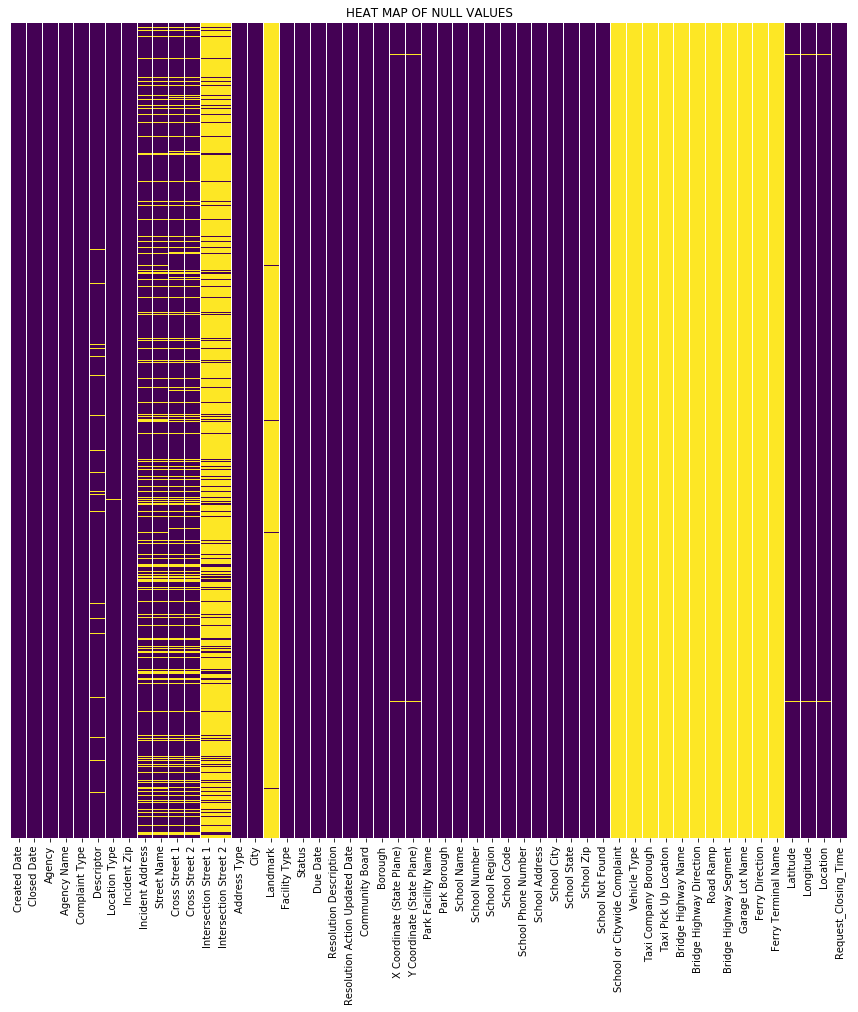

In [11]:
# Checking missing Values 
plt.figure(figsize=(15,15))
plt.title("HEAT MAP OF NULL VALUES")
sns.heatmap(service_request.iloc[:,1:].isnull() , yticklabels=False ,cbar=False, cmap='viridis')
plt.show()

So from above analysis we can see that **'Intersection Street 1','Intersection Street 2', 'Landmark','School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'** are not possible for analysis as they have too much null values

#### Complaint Type Analysis

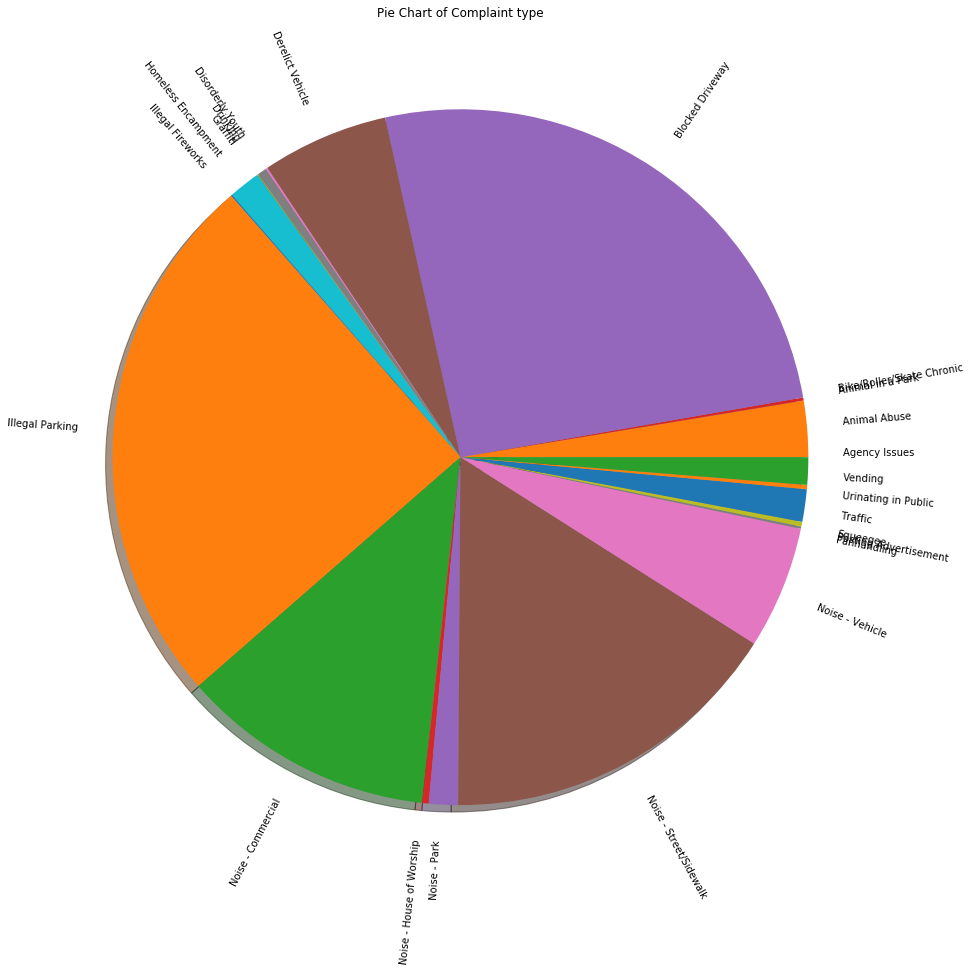

STATS
----------------------
count               298534
unique                  23
top       Blocked Driveway
freq                 76810
Name: Complaint Type, dtype: object
----------------------
Complaint Type
Animal in a Park                 1
Squeegee                         4
Agency Issues                    6
Graffiti                       113
Illegal Fireworks              168
Disorderly Youth               286
Panhandling                    305
Bike/Roller/Skate Chronic      424
Urinating in Public            592
Posting Advertisement          648
Noise - House of Worship       929
Drinking                      1275
Vending                       3795
Noise - Park                  4022
Homeless Encampment           4416
Traffic                       4496
Animal Abuse                  7768
Noise - Vehicle              17033
Derelict Vehicle             17588
Noise - Commercial           35247
Noise - Street/Sidewalk      48076
Illegal Parking              74532
Blocked Driveway   

In [12]:
freq_complaint = service_request.groupby('Complaint Type').agg('count')['Unique Key']
# explode = np.zeros(23)
# explode[0] = 2
plt.figure(figsize=(16,16))
plt.title('Pie Chart of Complaint type')
plt.pie(x=freq_complaint.values.astype('float64') ,shadow=True, labels=freq_complaint.index , rotatelabels=True , )
plt.show()

print("STATS\n----------------------\n" , service_request['Complaint Type'].describe() , sep='')

print('----------------------')
print(service_request.groupby('Complaint Type').agg('count')['Unique Key'].sort_values())

#### Location Type Analysis

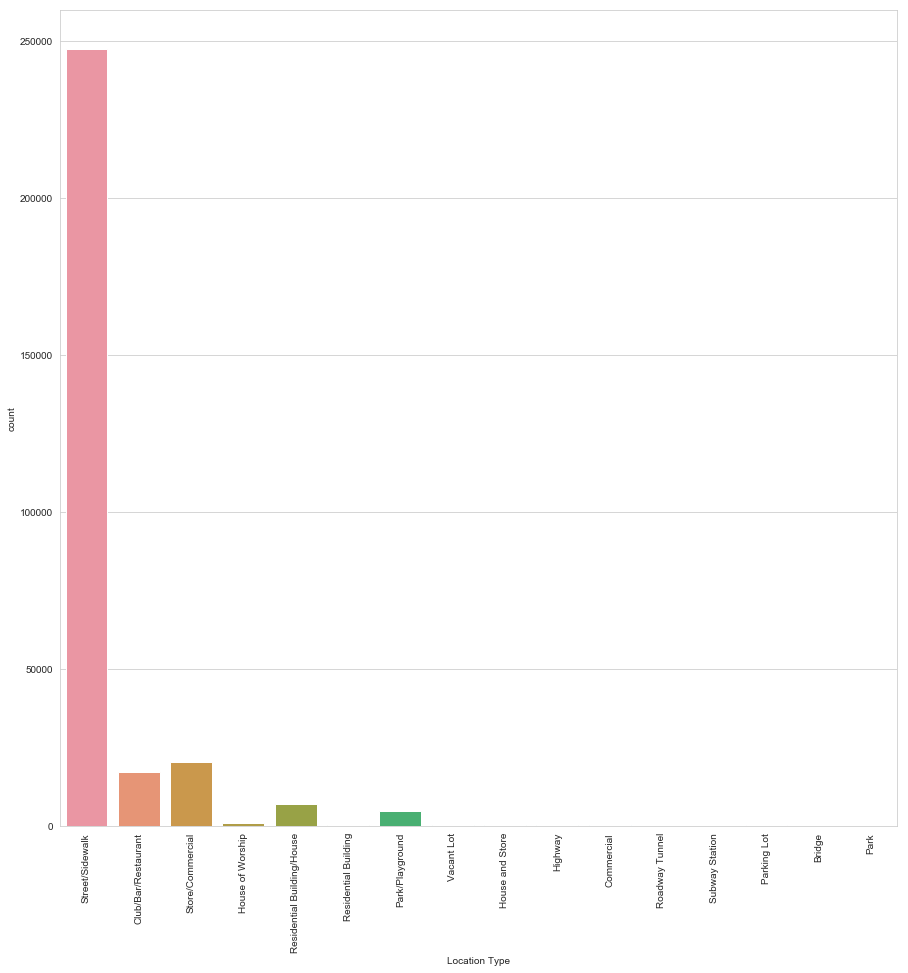

STATS
----------------------------
count              298406
unique                 16
top       Street/Sidewalk
freq               247503
Name: Location Type, dtype: object


In [88]:
plt.figure(figsize=(15,15))
sns.countplot(x='Location Type' , data=service_request )
plt.xticks(rotation='vertical')
plt.show()
print("STATS\n----------------------------\n" , service_request['Location Type'].describe() , sep='')

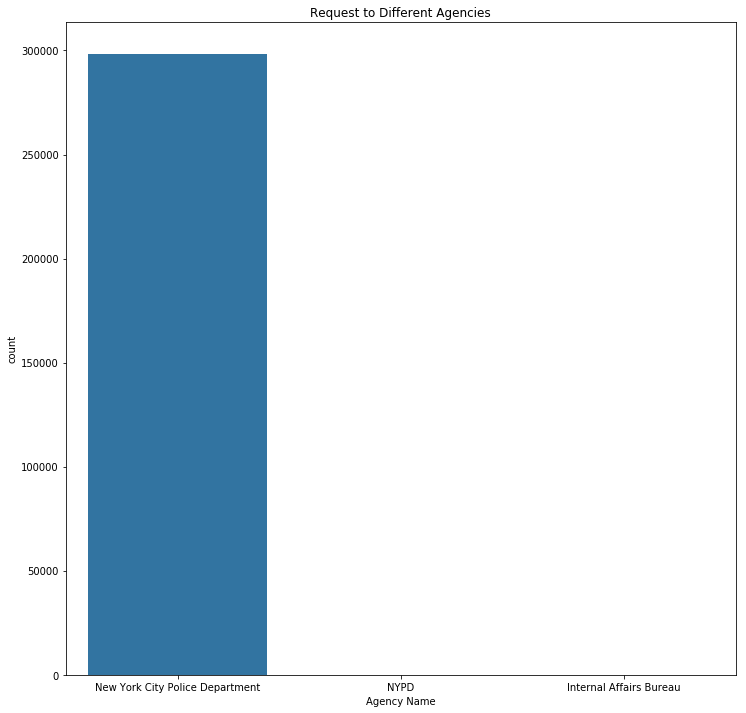

STATS
-------------------------
count                              298534
unique                                  3
top       New York City Police Department
freq                               298527
Name: Agency Name, dtype: object
-------------------------
Agency Name
Internal Affairs Bureau                 6
NYPD                                    1
New York City Police Department    298527
Name: Unique Key, dtype: int64


In [14]:
plt.figure(figsize=(12,12))
plt.title("Request to Different Agencies")

sns.countplot(x = 'Agency Name' , data=service_request)

plt.show()

print("STATS\n-------------------------\n" , service_request['Agency Name'].describe() , sep='')
print("-------------------------")
print(service_request.groupby('Agency Name').agg('count')['Unique Key'])

### 4.Mean of request closing time based on complaint type grouped under different location

In [15]:
service_request['new'] = service_request['Request_Closing_Time'].values.astype(np.int64)

newss = service_request.groupby(['Location Type' , 'Complaint Type']).mean()

newss.new.apply(pd.to_timedelta)

Location Type               Complaint Type           
Bridge                      Homeless Encampment         0 days 03:49:09.500000
Club/Bar/Restaurant         Drinking                    0 days 04:32:44.923287
                            Noise - Commercial          0 days 03:03:50.116976
                            Urinating in Public                0 days 07:55:12
Commercial                  Animal Abuse                0 days 05:20:33.967741
Highway                     Derelict Vehicle            0 days 08:11:44.538461
                            Homeless Encampment         0 days 03:16:16.200000
                            Traffic                     0 days 03:26:51.639784
House and Store             Animal Abuse                0 days 05:00:47.741935
House of Worship            Noise - House of Worship    0 days 03:11:49.996763
Park                        Animal in a Park                  14 days 00:50:05
Park/Playground             Animal Abuse                0 days 03:42:08.97540

### 5.1.Avg Response time for various complaint type

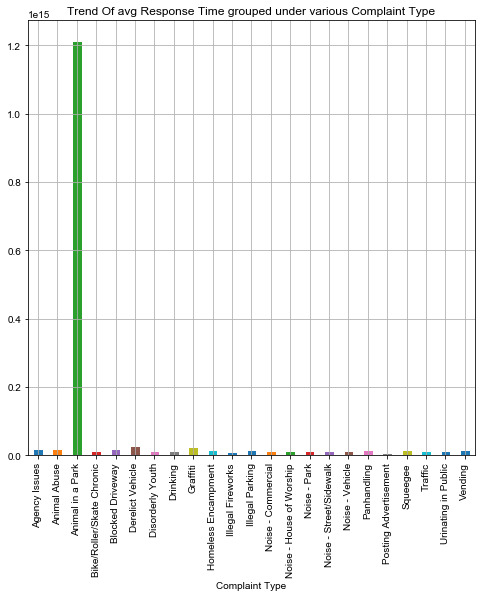

-----------------------------------------------------------------------
Conclusion :

Mean = 0 days 18:35:36.238295
Mean Excluding Animal in a park row  = 0 days 04:07:40.385490
Std Excluding Animal in a park row = 0 days 01:15:51.604037


In [16]:
que_5a = service_request.groupby('Complaint Type').mean()
plt.figure(figsize=(8,8))
plt.title('Trend Of avg Response Time grouped under various Complaint Type')
sns.set_style("whitegrid")
que_5a.new.apply(pd.to_timedelta).plot(kind='bar')
# que_5a.new.apply(pd.to_timedelta).plot(kind='line' , cmap = 'viridis' , x=None)
plt.show()

print("-----------------------------------------------------------------------")

mean_exc_animal_in_park = pd.to_timedelta(que_5a['new'].drop(index='Animal in a Park').mean())
std_exc_animal_in_park = pd.to_timedelta(que_5a['new'].drop(index='Animal in a Park').agg('std'))
mean_ = que_5a['new'].apply(pd.to_timedelta).mean()
print("Conclusion :\n")
print("Mean =" , mean_)
print("Mean Excluding Animal in a park Location Type  =" , mean_exc_animal_in_park)
print("Std Excluding Animal in a park  Location Type =" , std_exc_animal_in_park)

We except Animal in park (freq = 1) Complaint type row , other complaint types have almost similar avg response time.

#### 5.2.The Relation between Complaint Type and Location

In this section we make a Logistics Regression model to predict the Location of inputted Complaint Type.

In [17]:
service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,new
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,3315000000000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,5176000000000
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,17491000000000
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,27914000000000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,12422000000000


In [18]:
service_request.groupby('Location Type' ).agg('count')['Complaint Type'].reset_index()

,Location Type,Complaint Type
0,Bridge,2
1,Club/Bar/Restaurant,17227
2,Commercial,62
3,Highway,214
4,House and Store,93
5,House of Worship,927
6,Park,1
7,Park/Playground,4751
8,Parking Lot,117
9,Residential Building,227


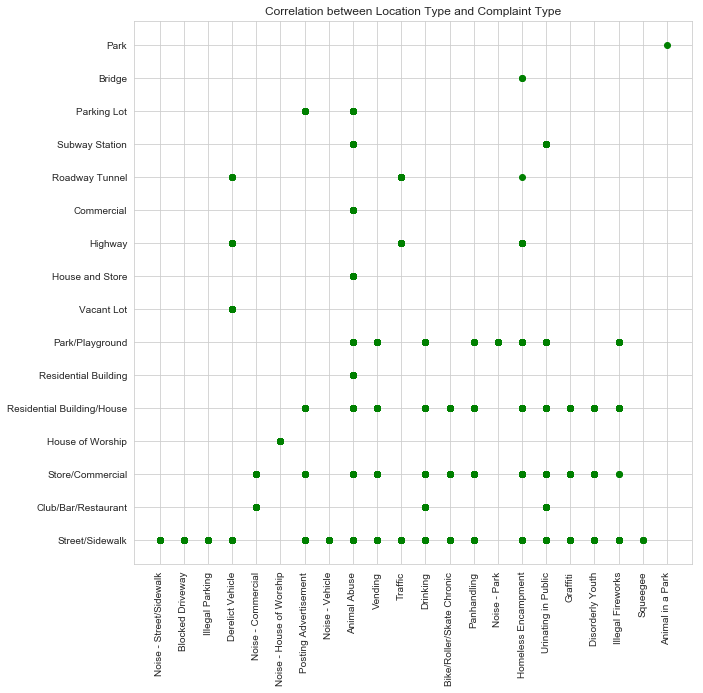

In [20]:
plt.figure(figsize=(10,10))
plt.title('Correlation between Location Type and Complaint Type')
plt.scatter(data=service_request.dropna(subset=['Complaint Type' , 'Location Type']) , x='Complaint Type' , y='Location Type' , color = 'green' )
plt.xticks(rotation='vertical')
plt.show()

In [47]:
que_5b = service_request[['Complaint Type' , 'Location Type']].dropna(subset=['Location Type'])

In [48]:
que_5b.describe()

,Complaint Type,Location Type
count,298406,298406
unique,22,16
top,Blocked Driveway,Street/Sidewalk
freq,76773,247503


In [49]:
que_5b_test = pd.get_dummies(data=que_5b , columns=['Complaint Type'] )

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(que_5b_test['Location Type'])

y = label_encoder.transform(que_5b_test['Location Type'])
X = que_5b_test.iloc[: , 1:]

In [67]:
X.head()

,Complaint Type_Animal Abuse,Complaint Type_Animal in a Park,Complaint Type_Bike/Roller/Skate Chronic,Complaint Type_Blocked Driveway,Complaint Type_Derelict Vehicle,Complaint Type_Disorderly Youth,Complaint Type_Drinking,Complaint Type_Graffiti,Complaint Type_Homeless Encampment,Complaint Type_Illegal Fireworks,...,Complaint Type_Noise - House of Worship,Complaint Type_Noise - Park,Complaint Type_Noise - Street/Sidewalk,Complaint Type_Noise - Vehicle,Complaint Type_Panhandling,Complaint Type_Posting Advertisement,Complaint Type_Squeegee,Complaint Type_Traffic,Complaint Type_Urinating in Public,Complaint Type_Vending
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 101 )

In [71]:
X_train.head()

,Complaint Type_Animal Abuse,Complaint Type_Animal in a Park,Complaint Type_Bike/Roller/Skate Chronic,Complaint Type_Blocked Driveway,Complaint Type_Derelict Vehicle,Complaint Type_Disorderly Youth,Complaint Type_Drinking,Complaint Type_Graffiti,Complaint Type_Homeless Encampment,Complaint Type_Illegal Fireworks,...,Complaint Type_Noise - House of Worship,Complaint Type_Noise - Park,Complaint Type_Noise - Street/Sidewalk,Complaint Type_Noise - Vehicle,Complaint Type_Panhandling,Complaint Type_Posting Advertisement,Complaint Type_Squeegee,Complaint Type_Traffic,Complaint Type_Urinating in Public,Complaint Type_Vending
191109,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201522,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219279,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115588,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
model.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
predictions = model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

# print(predictions[:15])
# print(y_test[:15])

[12 12 13 12 13 13 13 12 10 13 13 12 13 13 13]
[ 1 12 13  1 13 13 13 12 10 13 13  1 13 13 13]


In [91]:
print(classification_report(label_encoder.inverse_transform(y_test) , label_encoder.inverse_transform(predictions)))

# print(confusion_matrix(y_test , predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                            precision    recall  f1-score   support

       Club/Bar/Restaurant       0.00      0.00      0.00      5220
                Commercial       0.00      0.00      0.00        21
                   Highway       0.00      0.00      0.00        76
           House and Store       0.00      0.00      0.00        32
          House of Worship       1.00      1.00      1.00       261
                      Park       0.00      0.00      0.00         1
           Park/Playground       1.00      0.84      0.92      1359
               Parking Lot       0.00      0.00      0.00        31
      Residential Building       0.00      0.00      0.00        70
Residential Building/House       0.65      0.74      0.69      2045
            Roadway Tunnel       0.00      0.00      0.00        13
          Store/Commercial       0.52      0.91      0.66      6006
           Street/Sidewalk       0.98      0.99      0.99     74363
            Subway Station       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
